# Discovering structure in heatmap data

In [1]:
import pandas as pd
import seaborn as sns
sns.set(font="monospace")
%matplotlib inline

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

In [7]:
df.head()

network          1                     5                     6             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1        55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2        60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3        18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4        -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   

network                                7               ...             16  \
node             2                     1               ...              3   
hemi            lh         rh         lh         rh    ...             rh   
0       -47.664265  12.284122   1.566538 -13.042585    ...       0.607904   
1        10.269546  31.275831 -26.309488 -18.077026    ...      57.495071   
2        -5.314236   2.372976  -7.342168 -24.550989    ...      28.317369   
3        32.634335  45.825409 -47.632999  -6.580215    ...      71.439629   
4       -33.975418 -24.149668  -6.315651 -29.344135    ...      95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 48 columns]

In [3]:
# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

In [4]:
# Create a custom palette to identify the networks
network_pal = sns.cubehelix_palette(len(used_networks),
                                    light=.9, dark=.1, reverse=True,
                                    start=1, rot=-2)
network_lut = dict(zip(map(str, used_networks), network_pal))

In [5]:
# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)

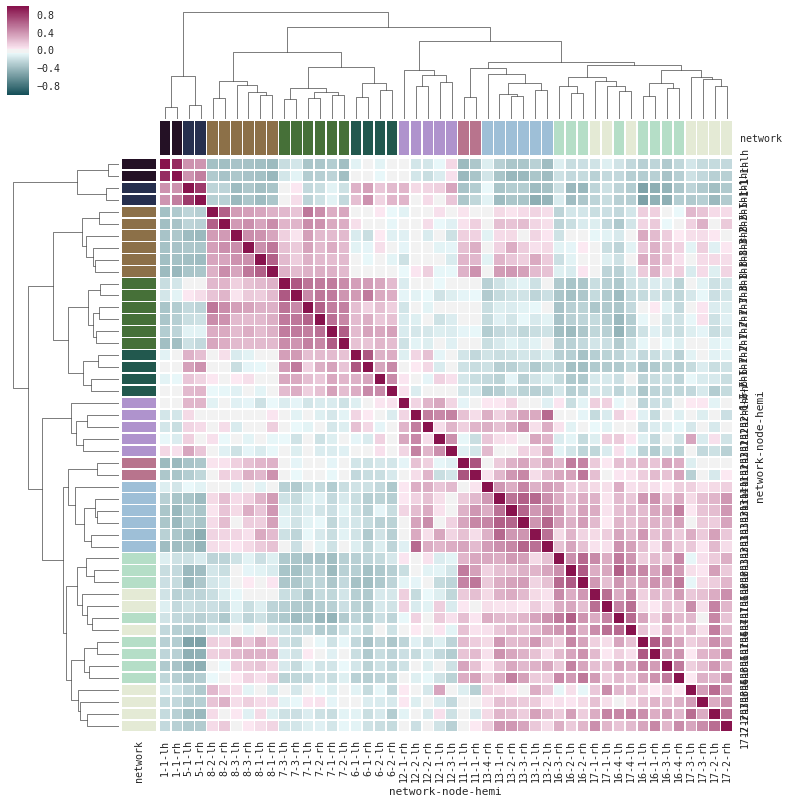

In [6]:
# Draw the full plot
sns.clustermap(df.corr(), row_colors=network_colors, linewidths=.5,
               col_colors=network_colors, figsize=(13, 13), cmap=cmap)